In [1]:
from dataloader import DataLoaderLite
import numpy as np
import os


In [2]:
B = 2
T = 1
split = 'train'
data_dir = "/home/ben347/data/pot_pick_place"



In [3]:
episodes = os.listdir(data_dir)
num_episodes = len(episodes)
num_episodes


3

In [4]:
indices = np.random.choice(num_episodes, size=B, replace=False)
indices


array([1, 0])

In [5]:
dataloader = DataLoaderLite(data_dir, B, T, split, indices)


Loading train episodes: ['1.hdf5', '2.hdf5']
Found 2 episodes


In [6]:
# Get a batch of data
actions, q_pos, images, progress, next_image = dataloader.next_batch()

# Print shapes of returned tensors
print(f"Actions shape: {actions.shape}")
print(f"Q_pos shape: {q_pos.shape}")
print(f"Images shape: {images.shape}")
print(f"Progress shape: {progress.shape}")
print(f"Next image shape: {next_image.shape}")


Actions shape: torch.Size([2, 7])
Q_pos shape: torch.Size([2, 7])
Images shape: torch.Size([2, 3, 3, 224, 224])
Progress shape: torch.Size([2, 1])
Next image shape: torch.Size([2, 3, 224, 224])


In [7]:
from model import WorldModelCNN


In [8]:
worldModel = WorldModelCNN()


In [9]:
import torch


In [10]:
# Put everything on the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
worldModel.to(device)
actions = actions.to(device)
q_pos = q_pos.to(device)
images = images.to(device)
progress = progress.to(device)
next_image = next_image.to(device)

worldModel = WorldModelCNN().to(device)


In [11]:
output = worldModel(images, actions, q_pos, progress)
output.shape


torch.Size([2, 3, 224, 224])

In [12]:
import matplotlib.pyplot as plt


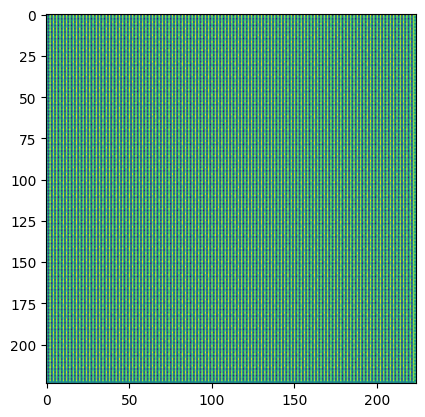

: 

In [13]:
output_np = output.detach().cpu().numpy()
plt.imshow(output_np[0, 0, :, :])
plt.show()
